In [2]:
%matplotlib inline

import sys
import numpy as np
import scipy.sparse as ssp
import pandas as pd
import os
import matplotlib.pyplot as plt
#import scrublet as scr
import scanpy as sc
import time
# !!!!
# Change this path to point to folder containing helper_functions.py
sys.path.append('/Users/ignas/Dropbox (HMS)/HMS_Klein-lab')
import helper_functions as hf


In [37]:
import scipy.stats as scs

In [158]:
D = {}
for s in ['iPSC', 'K562', 'l929']:
    D[s] = sc.read_h5ad(f'data/cell_culturing_in_CAGE/{s}_expression.h5ad')

In [172]:
D['iPSC'].uns['dge_data'][D['iPSC'].uns['dge_data']['FDR']<0.05]

,Wells (TPM),CAGEs (TPM),Log2FC,Gene,PValue,FDR,Zscore,bin_mean,bin_sd
GNG5_hg,40.000000,0.0,-2.321928,GNG5_hg,3.844242e-06,0.025070,-6.072363,-0.199611,0.422921
HSPE1_hg,136.000000,12.6,-2.691574,HSPE1_hg,1.223552e-05,0.043901,-5.465128,-0.099788,0.555815
RPS10_hg,133.399994,0.0,-3.841973,RPS10_hg,6.648840e-10,0.000017,-7.262468,-0.134574,0.571873
NDUFC2_hg,101.400002,5.8,-2.817753,NDUFC2_hg,4.072676e-06,0.025070,-5.471476,-0.134574,0.571873
COX6A1_hg,36.799999,0.0,-2.226509,COX6A1_hg,6.914520e-06,0.028944,-5.846743,-0.199611,0.422921
NDUFA11_hg,64.000000,3.0,-2.509014,NDUFA11_hg,4.990871e-06,0.025070,-6.060368,-0.158346,0.461437
MIF_hg,117.800003,5.2,-3.071745,MIF_hg,6.001987e-07,0.007537,-6.384998,-0.127706,0.530909


In [173]:
D['K562'].uns['dge_data'][D['K562'].uns['dge_data']['FDR']<0.05]

,Wells (TPM),CAGEs (TPM),Log2FC,Gene,PValue,FDR,Zscore,bin_mean,bin_sd


In [174]:
D['l929'].uns['dge_data'][D['l929'].uns['dge_data']['FDR']<0.05]

,Wells (TPM),CAGEs (TPM),Log2FC,Gene,PValue,FDR,Zscore,bin_mean,bin_sd
Kcnab1_mm,163.043488,0.869565,-3.992769,Kcnab1_mm,2.544729e-09,0.00005,-11.393098,-0.004245,0.365022


## Plot gene expression scatter plots

In [ ]:
def plot_gene_scatter(adata, s, gene_mask, display = False):
    fig,ax = plt.subplots(1, 1, figsize=(3.2,2.8), dpi = 200)
    
    #Data
    x =adata[adata.obs['sample'] == 'Wells'].X.A.flatten()
    y =adata[adata.obs['sample'] == 'CAGEs'].X.A.flatten()
    
    #TPM normalization
    x = ((x/x.sum())*1e6)
    y = ((y/y.sum())*1e6)
    
    ax.scatter(x,y, marker = 'o', facecolors = 'None', edgecolors='black',s=4, alpha = 0.05)
    
    #R2
    r2 = scs.pearsonr(np.log10(x+1), np.log10(y+1))[0]**2
    ax.text(0.2, 30000, '$R^2$ = ' +
            str(np.round(r2, 2)), fontsize = 12)

    
    #Genes with FDR < 0.05 from EdgeR analysis
    sign_genes = df_edgeR[s][df_edgeR[s]['FDR']<0.05]['Gene'].values
    x = adata[adata.obs['sample'] == 'Wells'][:, sign_genes].X.A.flatten()
    y = adata[adata.obs['sample'] == 'CAGEs'][:, sign_genes].X.A.flatten()
    
    #TPM normalization
    x = ((x/adata[adata.obs['sample'] == 'Wells'].X.A.flatten().sum())*1e6)+0.1
    y = ((y/adata[adata.obs['sample'] == 'CAGEs'].X.A.flatten().sum())*1e6)+0.1
    ax.scatter(x,y, marker = 'o', facecolors = 'None', edgecolors='Red',s=8, alpha = 0.8)
    
    #plot genes
    x = D[s][D[s].obs['sample'] == 'Wells'][:, gene_mask].X.A.flatten()
    y = D[s][D[s].obs['sample'] == 'CAGEs'][:, gene_mask].X.A.flatten()
    x = ((x/adata[adata.obs['sample'] == 'Wells'].X.A.flatten().sum())*1e6)
    y = ((y/adata[adata.obs['sample'] == 'CAGEs'].X.A.flatten().sum())*1e6)
    ax.scatter(x,y, marker = 'o', facecolors = 'red', edgecolors='yellow',s=8, alpha = 0.8)
    #overlay text
    
    if display == True:
        for iG, g in enumerate(gene_mask):
            x_cord = [x[iG], x[iG]*np.random.choice(np.linspace(0, 2, 20))**2]
            y_cord = [y[iG], y[iG]*np.random.choice(np.linspace(0, 2, 6))**3+np.random.choice(np.linspace(-10, 10e3, 20))]
            ax.plot(x_cord, y_cord, color = 'black', linewidth = 0.5)
            ax.text(x_cord[1], y_cord[1], g, fontsize = 6)

    ax.set_ylim(0.1, 1e5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Cells in wells \nExpression (TPM)', fontsize = 12)
    ax.set_ylabel('Cells in CAGEs \nExpression (TPM)', fontsize = 12)



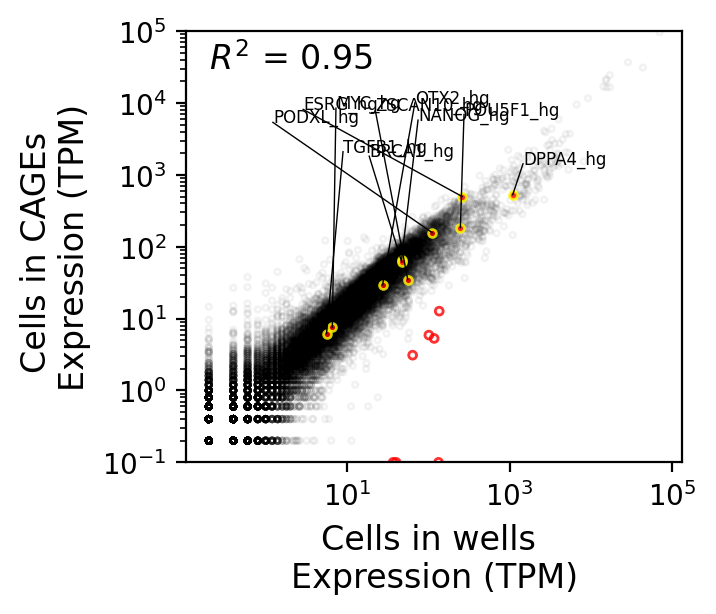

In [159]:
genes = np.array(['POU5F1_hg', 'DPPA4_hg', 'NANOG_hg', 'OTX2_hg', 'TGFB1_hg', 'MYC_hg', 'BRCA1_hg', 'ZSCAN10_hg', 'ESRG_hg', 'PODXL_hg'])
plot_gene_scatter(D['iPSC'], 'iPSC', gene_mask = genes, display = True)

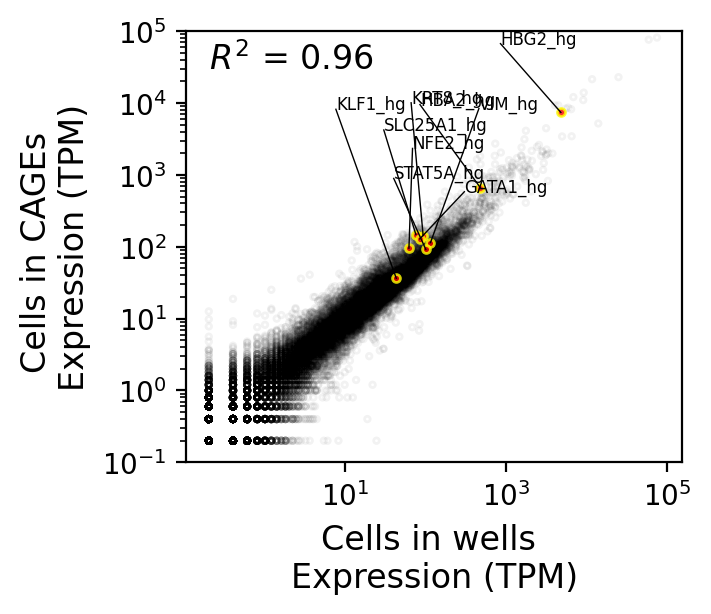

In [160]:
genes = np.array(['HBA2_hg', 'HBG2_hg', 'KRT8_hg', 'VIM_hg', 'SLC25A1_hg', 'KLF1_hg', 'GATA1_hg', 'STAT5A_hg', 'NFE2_hg'])
plot_gene_scatter(D['K562'], 'K562', gene_mask = genes, display = True)

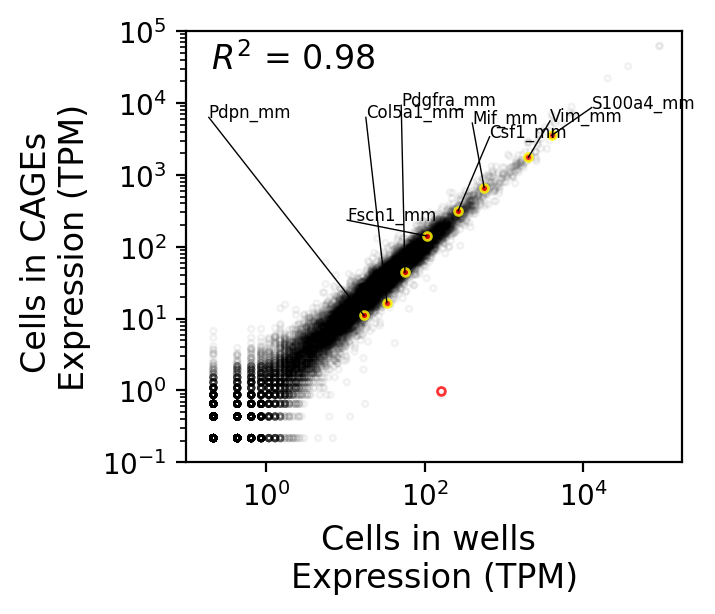

In [161]:
genes = np.array(['Mif_mm', 'Csf1_mm', 'Col5a1_mm', 'Vim_mm', 'Pdgfra_mm', 'S100a4_mm', 'Pdpn_mm', 'Fscn1_mm'])
plot_gene_scatter(D['l929'], 'l929', gene_mask = genes, display = True)

## Stress Genes

In [164]:

#Let's make a dataframe to stor log2 fold-changes
df_FC = {}
for s in ['iPSC', 'K562', 'l929']:
    x = D[s][D[s].obs['sample'] == 'Wells'].X.A.flatten()#[mouse_mask==0]
    y = D[s][D[s].obs['sample'] == 'CAGEs'].X.A.flatten()#[mouse_mask==0]
    
    x = ((x/x.sum())*1e6)
    y = ((y/y.sum())*1e6)
    
    df_FC[s] = pd.DataFrame([x, y, np.log2((y+10)/(x+10))]).T #Pseudocount is 10 to avoid large FC for lowly expressed genes
    df_FC[s].index = D_samp[pairs[s][0]].var_names.values.astype(str)
    df_FC[s].columns = ['Wells', 'CAGEs', 'Log2FC']

In [165]:
#define a list of genes for hs and mm samples
stress_mm= np.array(['Fos_mm', 'Hsf1_mm', 'Atf5_mm', 'Gadd45a_mm', 'Gadd45b_mm', 'Gadd45g_mm', 'Hif1a_mm', 'Nfe2l2_mm', 'Gpx3_mm', 'Gpx7_mm', 'Hmox1_mm', 'Selenos_mm', 'Trp53_mm'])
stress= np.array(['FOS_hg', 'HSF1_hg', 'ATF5_hg', 'GADD45A_hg', 'GADD45B_hg', 'GADD45G_hg', 'HIF1A_hg', 'NFE2L2_hg', 'GPX3_hg', 'GPX7_hg', 'HMOX1_hg', 'SELENOS_hg', 'TP53_hg'])


In [166]:
import seaborn as sns

[Text(0, 0.5, 'iPSCs'), Text(0, 1.5, 'K562'), Text(0, 2.5, 'L929')]

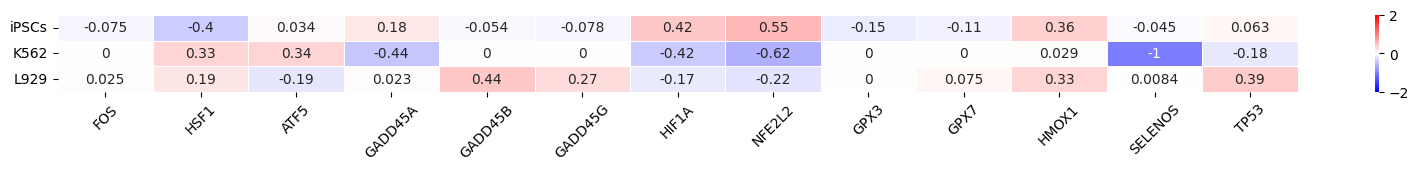

In [167]:
fig, ax = plt.subplots(figsize = (20, 1))

sns.heatmap(np.array([df_FC['iPSC'].loc[stress]['Log2FC'].values,
df_FC['K562'].loc[stress]['Log2FC'].values,
df_FC['l929'].loc[stress_mm]['Log2FC'].values]), cmap ='bwr', vmin =-2, vmax =2, ax = ax, linewidths=0.5, annot=True)
ax.set_xticklabels([g[:-3] for g in stress], rotation=45)
ax.set_yticklabels(['iPSCs', 'K562', 'L929'], rotation =0)
